# 数据预处理（归一+可视化）

In [1]:
import pandas as pd
data=pd.read_excel('中心城市客运量 巡游出租汽车 广州 .xlsx',engine='openpyxl',header=0)
print(data.shape)
data.head()

(48, 3)


,时间,中心城市客运量:巡游出租汽车:广州:当期值:月,归一值
0,2022-12-31,1488,0.03
1,2022-11-30,1355,0.00
2,2022-10-31,2489,0.27
3,2022-09-30,3110,0.42
4,2022-08-31,3481,0.51


In [2]:
# 将时间列转换为日期时间类型并按时间升序排列
data['时间'] = pd.to_datetime(data['时间'])
data = data.sort_values(by='时间')

In [3]:
# 重置索引并添加新的序号列
data = data.reset_index(drop=True)

In [4]:
data.head()

,时间,中心城市客运量:巡游出租汽车:广州:当期值:月,归一值
0,2019-01-31,5391,0.97
1,2019-02-28,4451,0.74
2,2019-03-31,5515,1.00
3,2019-04-30,5249,0.94
4,2019-05-31,5083,0.90


In [5]:
data.columns

Index(['时间', '中心城市客运量:巡游出租汽车:广州:当期值:月', '归一值'], dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   时间                       48 non-null     datetime64[ns]
 1   中心城市客运量:巡游出租汽车:广州:当期值:月  48 non-null     int64         
 2   归一值                      48 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.3 KB


In [7]:
import matplotlib.pyplot as plt

In [9]:
df = pd.DataFrame(data)
df

,时间,中心城市客运量:巡游出租汽车:广州:当期值:月,归一值
0,2019-01-31,5391,0.97
1,2019-02-28,4451,0.74
2,2019-03-31,5515,1.00
3,2019-04-30,5249,0.94
4,2019-05-31,5083,0.90
5,2019-06-30,4947,0.86
6,2019-07-31,5049,0.89
7,2019-08-31,4957,0.87
8,2019-09-30,4888,0.85
9,2019-10-31,4776,0.82


# arima模型建立

In [11]:
from __future__ import print_function
import numpy as np
from scipy import  stats
import statsmodels.api as sm
import time
from datetime import datetime
from statsmodels.graphics.api import qqplot

<Axes: >

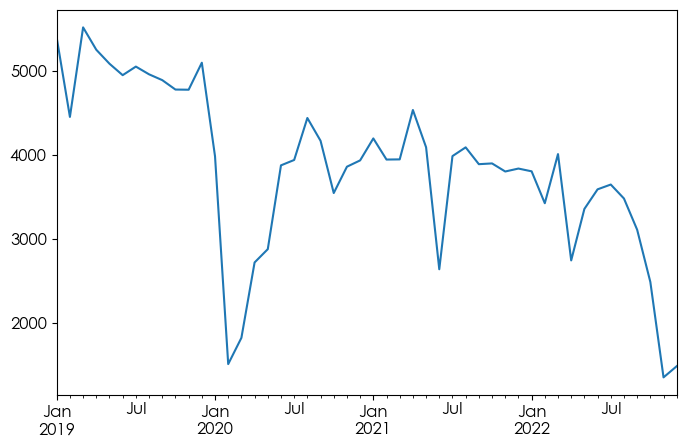

In [23]:
dta=pd.Series(df['中心城市客运量:巡游出租汽车:广州:当期值:月'])
# 创建与数据长度相匹配的日期范围
date_range = pd.date_range(start='2019-01-31', periods=len(dta), freq='M')
# 将日期范围设置为索引
dta.index = date_range
dta.plot(figsize=(8,5))

# 拆分d

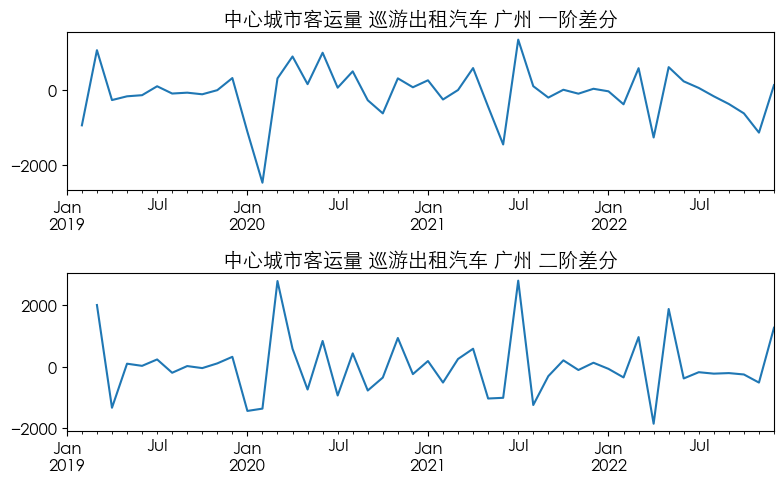

In [25]:
# 一阶差分（拆分d）
diff1 = dta.diff(1)

# 二阶差分
diff2 = diff1.diff(1)

# 创建图形
fig, ax = plt.subplots(2, 1, figsize=(8, 5))

# 绘制一阶差分数据图
diff1.plot(ax=ax[0])
ax[0].set_title('中心城市客运量 巡游出租汽车 广州 一阶差分')

# 绘制二阶差分数据图
diff2.plot(ax=ax[1])
ax[1].set_title('中心城市客运量 巡游出租汽车 广州 二阶差分')

# 设置图形标题和标签
plt.tight_layout()
plt.show()

# 一阶和二阶拆分区别不大，一阶已经得到一个基本平稳的时间序列，故使用一阶拆分

<Axes: title={'center': '中心城市客运量 巡游出租汽车 广州 一阶差分时间序列'}>

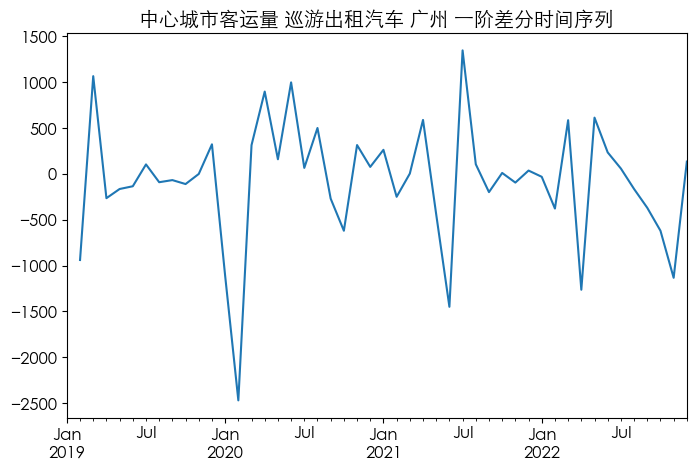

In [27]:
#一阶差分,得到一个基本平稳的时间序列
fig = plt.figure(figsize=(8,5))
ax1= fig.add_subplot(111)
diff1 = dta.diff(1)
# 添加标题
ax1.set_title('中心城市客运量 巡游出租汽车 广州 一阶差分时间序列')
diff1.plot(ax=ax1)

# 在ARIMA模型中选择合适的p,q

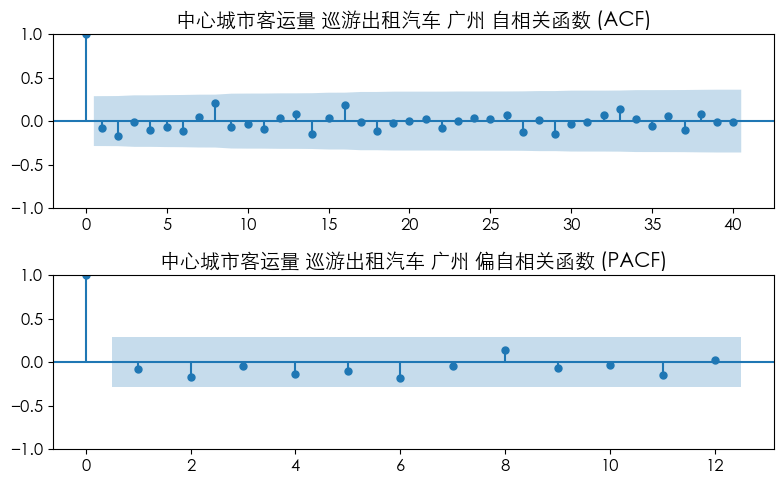

In [32]:
diff1= dta.diff(1) # 使用一阶差分的时间序列
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(diff1.dropna(), lags=40, ax=ax1)  # 使用 dropna() 移除由于差分产生的 NaN 值
ax1.set_title('中心城市客运量 巡游出租汽车 广州 自相关函数 (ACF)')
ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(diff1.dropna(), lags=12, ax=ax2)  # 使用 dropna() 移除由于差分产生的 NaN 值
ax2.set_title('中心城市客运量 巡游出租汽车 广州 偏自相关函数 (PACF)')
plt.tight_layout()  # 调整子图间距

# 经过检验，选择自回归阶数p为8，差分阶数d为1，移动平均阶数q为8

In [16]:
# 拟合 ARMA(8,1,8) 模型
arma_mod10 = sm.tsa.ARIMA(dta, order=(8, 1, 8)).fit()
print(arma_mod10.aic, arma_mod10.bic, arma_mod10.hqic)

# 拟合 ARMA(1,0,0) 模型
arma_mod01 = sm.tsa.ARIMA(dta, order=(1, 0, 0)).fit()
print(arma_mod01.aic, arma_mod01.bic, arma_mod01.hqic)

# 拟合 ARMA(2,1,2) 模型
arma_mod20 = sm.tsa.ARIMA(dta, order=(2, 1, 2)).fit()
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

# 拟合 ARMA(0,1,0) 模型
arma_mod010 = sm.tsa.ARIMA(dta, order=(0, 1, 0)).fit()
print(arma_mod010.aic, arma_mod010.bic, arma_mod010.hqic)

C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


769.3037546662522 800.7562638953232 781.1395451790769
764.9808253664941 770.5944283992177 767.1022141522889
752.2052142558438 761.4559522643941 755.6863291125569
747.6369777478428 749.4871253495529 748.3332007191855


C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\86158\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


# 选择ARIMA(8,1,8)模型

ARIMA（8，1，8）得到的预测结果与实际最符合

# 检验残差序列

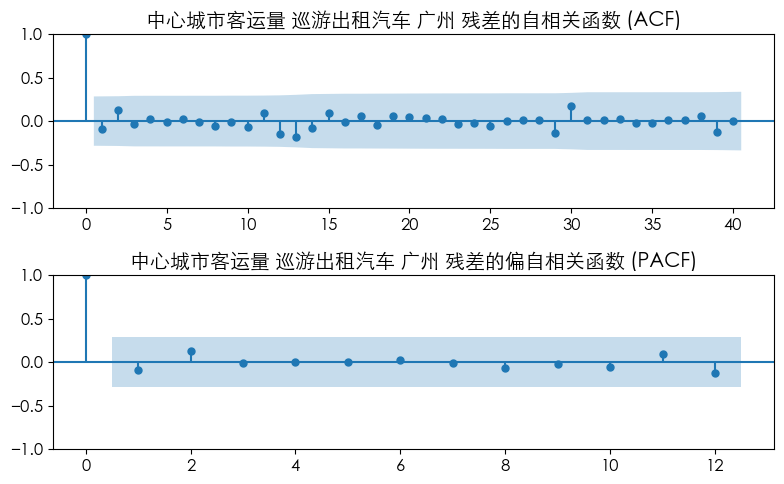

In [38]:
# 查模型的残差是否表现为白噪声
resid = arma_mod10.resid
# 绘制图形
fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(211)
sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax1)  # 绘制自相关图
ax1.set_title('中心城市客运量 巡游出租汽车 广州 残差的自相关函数 (ACF)')

ax2 = fig.add_subplot(212)
sm.graphics.tsa.plot_pacf(resid, lags=12, ax=ax2)  # 绘制偏自相关图
ax2.set_title('中心城市客运量 巡游出租汽车 广州 残差的偏自相关函数 (PACF)')

plt.tight_layout()  # 调整子图间距
plt.show()

In [35]:
print(sm.stats.durbin_watson(arma_mod10.resid.values))

1.546630547060376


结果为1.546630547060376，所以残差序列不存在自相关性。

# 观察是否呈正态分布

NormaltestResult(statistic=64.65996395207614, pvalue=9.104733279241895e-15)


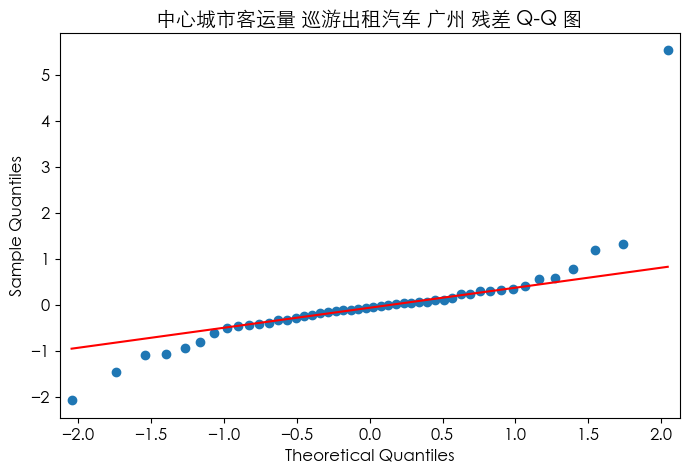

In [39]:
print(stats.normaltest(resid))
# 检测残差的正态性
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)
ax.set_title('中心城市客运量 巡游出租汽车 广州 残差 Q-Q 图')
plt.show()

结果表明基本符合正态分布

# 残差序列Ljung-Box检验，也叫Q检验预测

In [40]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,17), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))


            AC         Q  Prob(>Q)
lag                               
1.0  -0.092454  0.436477  0.508828
2.0   0.130963  1.331334  0.513931
3.0  -0.031432  1.384026  0.709283
4.0   0.023962  1.415344  0.841524
5.0  -0.010890  1.421963  0.921896
6.0   0.024228  1.455507  0.962395
7.0  -0.011813  1.463676  0.983541
8.0  -0.061238  1.688684  0.989115
9.0  -0.009284  1.693988  0.995436
10.0 -0.065243  1.962831  0.996617
11.0  0.095341  2.552449  0.995419
12.0 -0.148862  4.029769  0.982893
13.0 -0.179607  6.241786  0.936909
14.0 -0.084865  6.750172  0.943914
15.0  0.095301  7.410707  0.945235
16.0 -0.005818  7.413245  0.964450


prob值均大于0.05，所以残差序列不存在自相关性

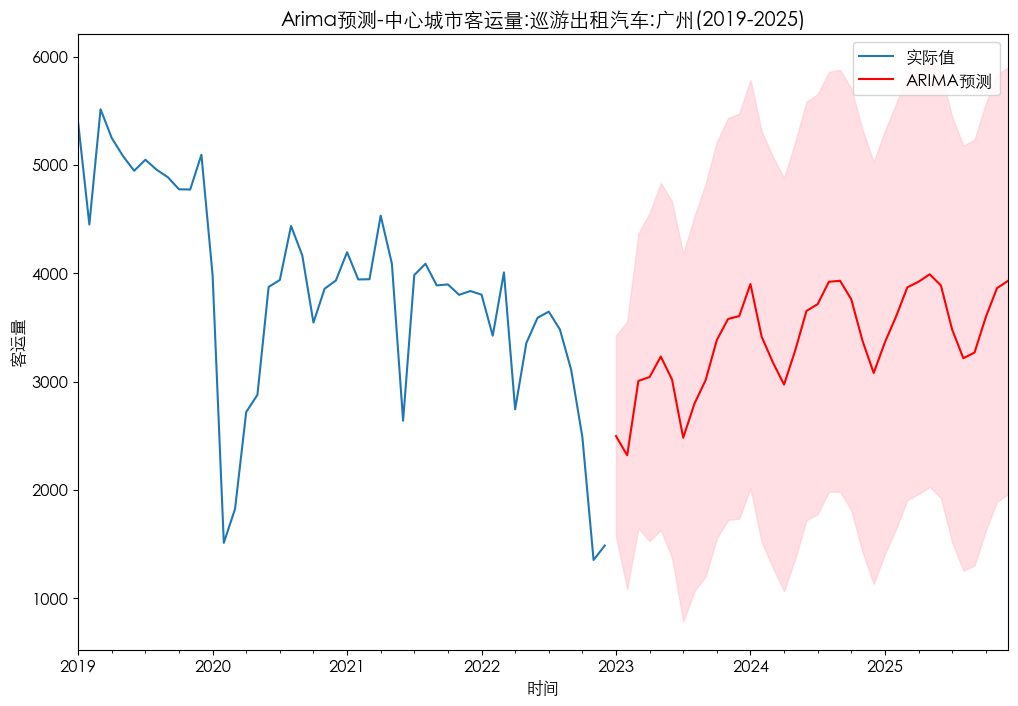

In [41]:
# 获取预测结果
forecast = arma_mod10.get_forecast(steps=36)  # 预测未来 36 个时间步长，即到2025年底

# 绘制实际数据和预测数据
fig, ax = plt.subplots(figsize=(12, 8))
dta.plot(ax=ax, label='实际值')  # 绘制全部实际数据

# 绘制预测数据
forecast.predicted_mean.plot(ax=ax, label='ARIMA预测', color='red')

# 绘制置信区间
ci = forecast.conf_int()
ax.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color='pink', alpha=0.5)

# 设置图形标题和标签
plt.xlabel('时间')
plt.ylabel('客运量')
plt.title('Arima预测-中心城市客运量:巡游出租汽车:广州(2019-2025)')
plt.legend()
plt.show()

